In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from tqdm import tqdm 
import sklearn.metrics as skmetrics 
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt

import warnings                               
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,Datetime,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
1,2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2,2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
3,2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
4,2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363
5,2018-01-01 12:10:00+00:00,103.805858,29.177815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,20.305917,NaN,NaN,274.00,3.781696
6,2018-01-01 12:20:00+00:00,89.304200,28.871782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.00,18.093654,NaN,NaN,265.00,3.727462
7,2018-01-01 12:30:00+00:00,136.319172,28.531796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,27.029096,NaN,NaN,255.00,4.154484
8,2018-01-01 12:40:00+00:00,217.112015,28.344782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.00,43.690222,NaN,NaN,249.00,4.642134
9,2018-01-01 12:50:00+00:00,256.428119,28.244747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.00,51.545672,NaN,NaN,241.00,4.841759


In [3]:
data_wind = data[["Datetime","ActivePower","AmbientTemperatue","NacellePosition","ReactivePower","WindDirection","WindSpeed"]]

In [4]:
data_wind.head(10)

,Datetime,ActivePower,AmbientTemperatue,NacellePosition,ReactivePower,WindDirection,WindSpeed
0,2018-01-01 06:20:00+00:00,26.212347,28.696304,252.00,3.976499,252.00,3.042750
1,2018-01-01 06:40:00+00:00,59.632658,29.052567,255.00,11.091660,255.00,3.424814
2,2018-01-01 06:50:00+00:00,40.889650,28.984758,264.75,4.234497,264.75,3.507172
3,2018-01-01 10:40:00+00:00,34.398111,30.282058,283.75,5.347792,283.75,3.442212
4,2018-01-01 12:00:00+00:00,29.797653,29.333519,274.00,6.022326,274.00,3.031363
5,2018-01-01 12:10:00+00:00,103.805858,29.177815,274.00,20.305917,274.00,3.781696
6,2018-01-01 12:20:00+00:00,89.304200,28.871782,265.00,18.093654,265.00,3.727462
7,2018-01-01 12:30:00+00:00,136.319172,28.531796,255.00,27.029096,255.00,4.154484
8,2018-01-01 12:40:00+00:00,217.112015,28.344782,249.00,43.690222,249.00,4.642134
9,2018-01-01 12:50:00+00:00,256.428119,28.244747,241.00,51.545672,241.00,4.841759


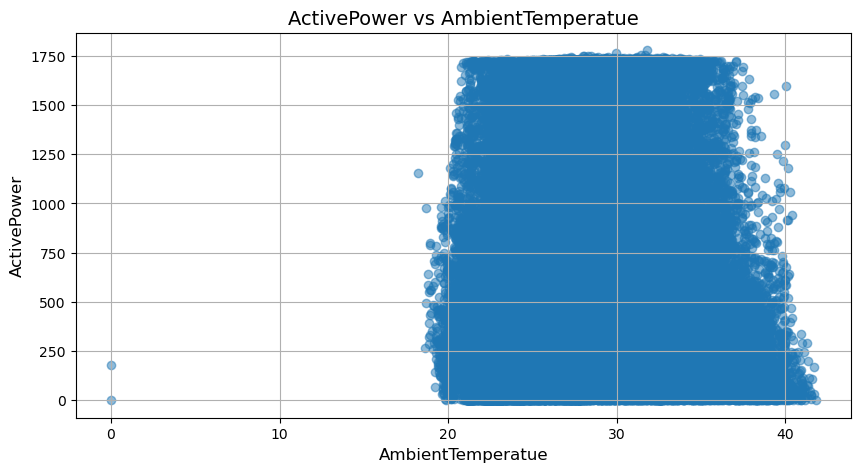

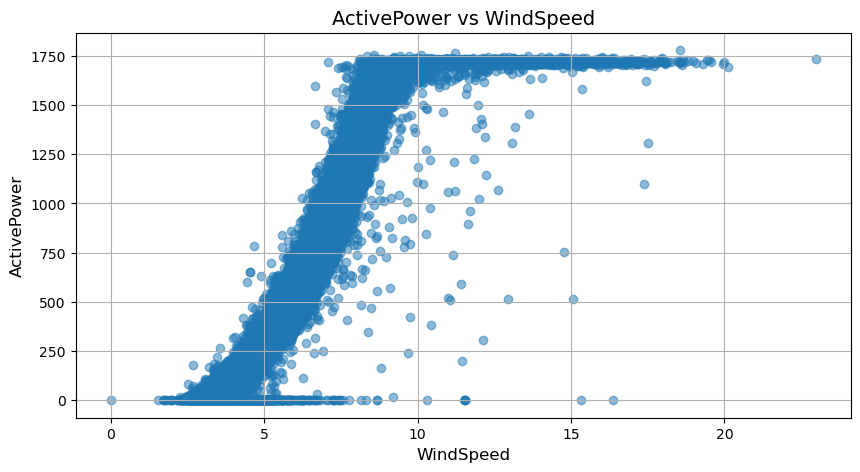

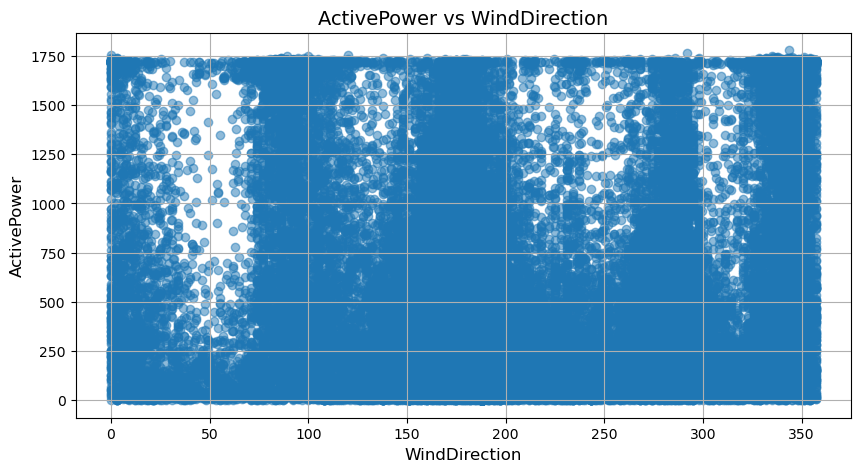

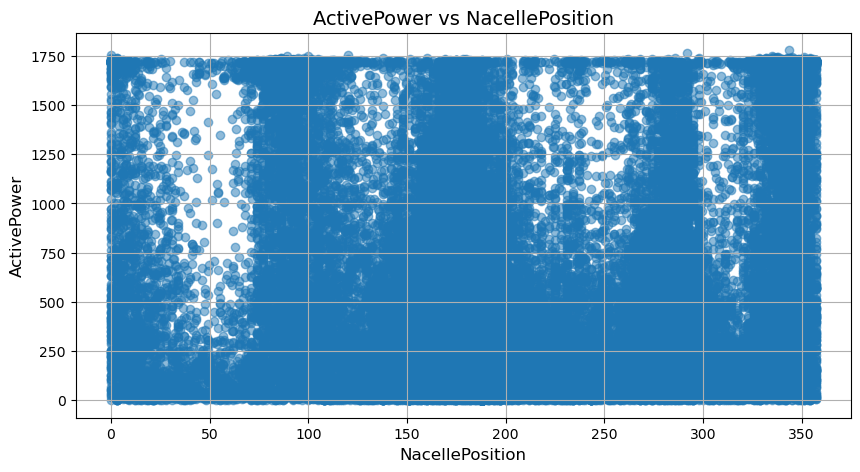

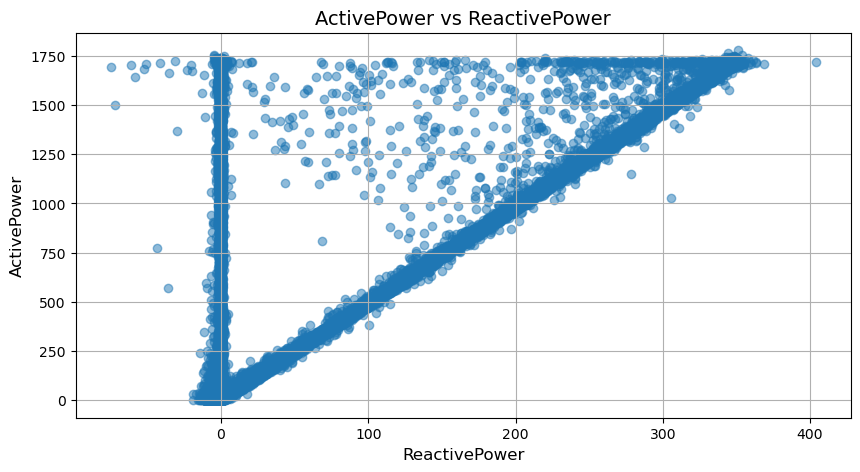

In [5]:
features = ['AmbientTemperatue', 'WindSpeed', 'WindDirection', 'NacellePosition', 'ReactivePower'] 

# Plot each feature against ActivePower in separate scatter plots.
for feature in features:
    plt.figure(figsize=(10, 5))  # Set the size of the figure
    plt.scatter(data_wind[feature], data_wind['ActivePower'], alpha=0.5)  
    plt.title(f'ActivePower vs {feature}', fontsize=14)  
    plt.xlabel(feature, fontsize=12)  
    plt.ylabel('ActivePower', fontsize=12)  
    plt.grid(True)  
    plt.show()  

# fit VAR model

In [6]:
def adf_test(timeseries):
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# define the function to difference the data ONCE
def diff(data, interval):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return diff

In [7]:
data_wind['Datetime'] = pd.to_datetime(data_wind['Datetime'])
data_wind.set_index('Datetime', inplace=True)

In [8]:
resampled = data_wind.resample('D').mean()
resampled

,ActivePower,AmbientTemperatue,NacellePosition,ReactivePower,WindDirection,WindSpeed
Datetime,,,,,,
2018-01-01 00:00:00+00:00,366.223561,25.528849,276.727612,74.042120,276.727612,5.263797
2018-01-02 00:00:00+00:00,462.550740,25.357526,274.105603,93.555723,274.105603,5.390719
2018-01-03 00:00:00+00:00,454.417752,24.379363,286.369130,91.627843,286.369130,5.295225
2018-01-04 00:00:00+00:00,369.952190,24.912347,284.445471,74.360621,284.445471,5.094994
2018-01-05 00:00:00+00:00,319.446595,23.535679,292.013293,64.366148,292.013293,4.915224
...,...,...,...,...,...,...
2020-03-11 00:00:00+00:00,466.289248,28.276232,183.729298,71.852813,183.729298,5.385570
2020-03-12 00:00:00+00:00,570.315539,29.094133,180.773250,84.040654,180.773250,5.693483
2020-03-13 00:00:00+00:00,619.637333,30.088163,187.621975,99.693231,187.621975,5.765318


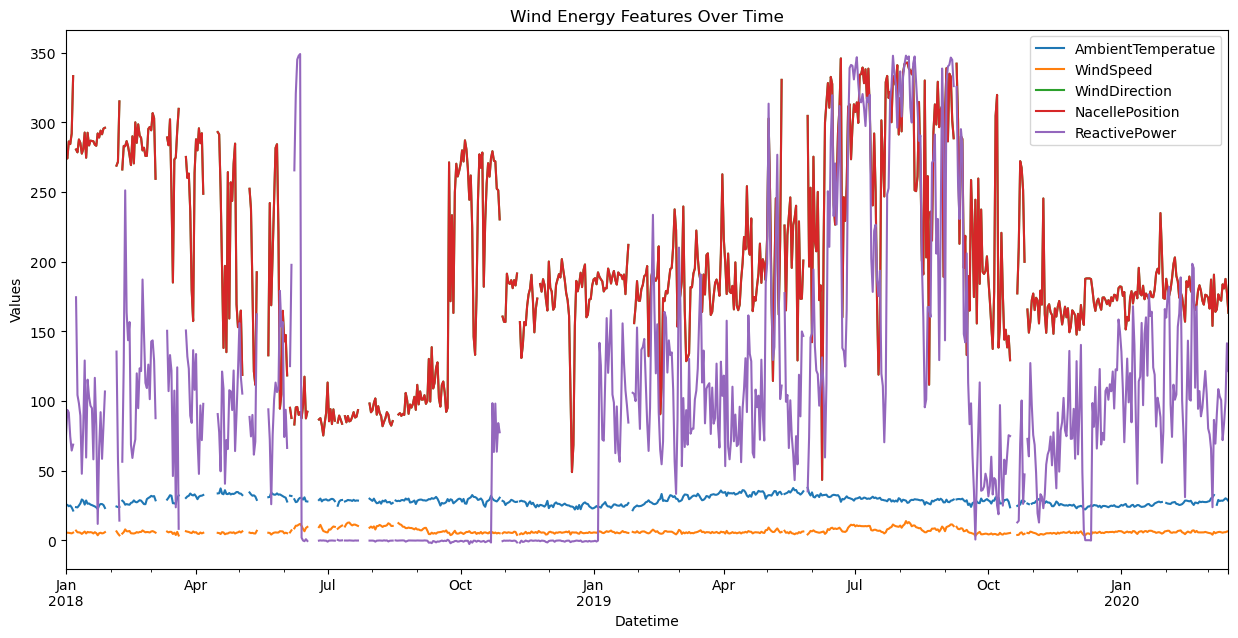

In [9]:
# Plot settings
title = 'Wind Energy Features Over Time'
ylabel = 'Values'
xlabel = ''
plt.figure(figsize=(15, 7))
ax = resampled[features[0]].plot(legend=True, title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

for feature in features[1:]:
    resampled[feature].plot(ax=ax, legend=True)

plt.show()

<Axes: xlabel='Datetime'>

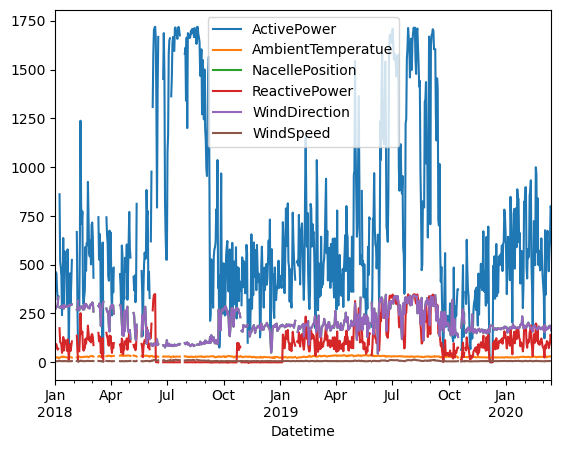

In [10]:
resampled.plot()

In [11]:
df1 = resampled.diff()

<Axes: xlabel='Datetime'>

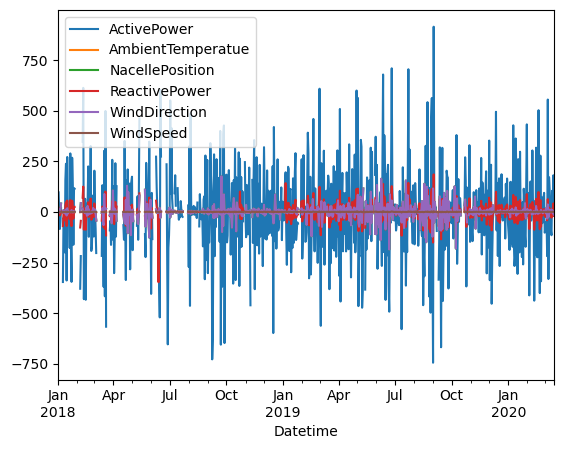

In [12]:
df1.plot()

In [13]:
df1 = df1.dropna()
adf_test(df1['AmbientTemperatue'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.666326e+01
p-value                        1.567519e-29
#Lags Used                     4.000000e+00
Number of Observations Used    6.920000e+02
Critical Value (1%)           -3.439835e+00
Critical Value (5%)           -2.865726e+00
Critical Value (10%)          -2.568999e+00
dtype: float64


In [14]:
adf_test(df1['NacellePosition'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.944274e+00
p-value                        2.614639e-17
#Lags Used                     1.300000e+01
Number of Observations Used    6.830000e+02
Critical Value (1%)           -3.439961e+00
Critical Value (5%)           -2.865781e+00
Critical Value (10%)          -2.569028e+00
dtype: float64


In [15]:
adf_test(df1['ReactivePower'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.476714e+01
p-value                        2.353065e-27
#Lags Used                     4.000000e+00
Number of Observations Used    6.920000e+02
Critical Value (1%)           -3.439835e+00
Critical Value (5%)           -2.865726e+00
Critical Value (10%)          -2.568999e+00
dtype: float64


In [16]:
adf_test(df1['WindDirection'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -9.944274e+00
p-value                        2.614639e-17
#Lags Used                     1.300000e+01
Number of Observations Used    6.830000e+02
Critical Value (1%)           -3.439961e+00
Critical Value (5%)           -2.865781e+00
Critical Value (10%)          -2.569028e+00
dtype: float64


In [17]:
adf_test(df1['WindSpeed'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -19.024983
p-value                          0.000000
#Lags Used                       2.000000
Number of Observations Used    694.000000
Critical Value (1%)             -3.439808
Critical Value (5%)             -2.865714
Critical Value (10%)            -2.568993
dtype: float64


In [18]:
def rolling_forecast_VAR(df, features, target, p_values, window_size, horizon):
    best_p = None
    best_rmse = float('inf')
    errors = {p: [] for p in p_values} 

    # Rolling forecast
    for t in range(len(df) - window_size - horizon + 1):
        train = df.iloc[t:t+window_size]
        test = df.iloc[t+window_size:t+window_size+horizon]

        for p in p_values:
            model = VAR(train[features])
            results = model.fit(p)
            predictions = results.forecast(train.values[-p:], steps=horizon)
            pred_df = pd.DataFrame(predictions, index=test.index, columns=features)
            rmse = np.sqrt(mean_squared_error(test[target], pred_df[target]))
            errors[p].append(rmse)

    # Summarize the errors
    for p in p_values:
        average_rmse = np.mean(errors[p])
        print(f'VAR({p}) RMSE: {average_rmse:.3f}')
        if average_rmse < best_rmse and not np.isnan(average_rmse):
            best_rmse = average_rmse
            best_p = p

    print(f'Best VAR({best_p}) with average RMSE: {best_rmse:.3f}')
    return best_p

In [19]:
# Features and target for the VAR model
features = ['AmbientTemperatue', 'WindSpeed', 'WindDirection', 'NacellePosition', 'ReactivePower', 'ActivePower']

# Calculate window_size and horizon
window_size = int(len(df1))-15 
horizon = 15 
p_values = [1, 2, 3, 4, 5]

best_p = rolling_forecast_VAR(df1, features, 'ActivePower', p_values, window_size, horizon)

VAR(1) RMSE: 214.842
VAR(2) RMSE: 224.607
VAR(3) RMSE: 301.239
VAR(4) RMSE: 551.128
VAR(5) RMSE: 655.636
Best VAR(1) with average RMSE: 214.842


In [20]:
model = VAR(df1[features])
results = model.fit(1)
# Forecasting for the next 15 days
nobs = 15
predictions = results.forecast(y=df1[features].values[-results.k_ar:], steps=nobs)

# Create the forecast index
last_date = df1.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=nobs, freq='D')

# Create a DataFrame for the forecasted values
df_forecast = pd.DataFrame(predictions, index=forecast_index, columns=features)

# Convert forecasted differenced values back to real values
df_forecast_cumsum = df_forecast.cumsum()
df_forecast_real = df_forecast_cumsum.add(resampled.iloc[-1])

In [21]:
df_forecast_real

,ActivePower,AmbientTemperatue,NacellePosition,ReactivePower,WindDirection,WindSpeed
2020-03-16 00:00:00+00:00,780.027346,28.402627,166.841134,120.879525,166.841134,6.369662
2020-03-17 00:00:00+00:00,779.638969,28.375268,165.906178,120.868599,165.906178,6.377097
2020-03-18 00:00:00+00:00,777.522924,28.376437,166.249526,120.142219,166.249526,6.368057
2020-03-19 00:00:00+00:00,775.587692,28.378520,166.203909,119.613056,166.203909,6.360242
2020-03-20 00:00:00+00:00,773.688900,28.378789,166.278181,119.046833,166.278181,6.352819
2020-03-21 00:00:00+00:00,771.761605,28.379801,166.315722,118.485361,166.315722,6.345158
2020-03-22 00:00:00+00:00,769.845577,28.380574,166.364414,117.923786,166.364414,6.337582
2020-03-23 00:00:00+00:00,767.925842,28.381417,166.409744,117.362020,166.409744,6.329980
2020-03-24 00:00:00+00:00,766.007244,28.382240,166.456084,116.800341,166.456084,6.322385
2020-03-25 00:00:00+00:00,764.088305,28.383069,166.502121,116.238634,166.502121,6.314789


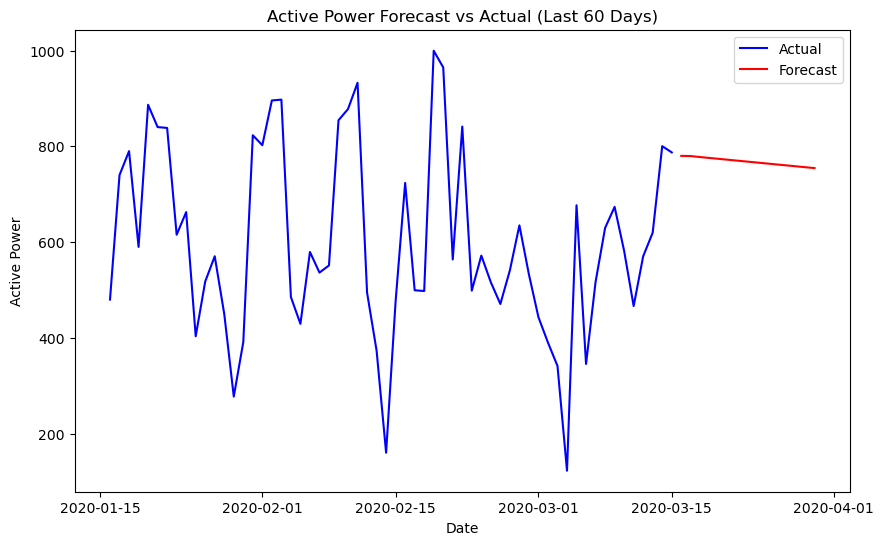

In [22]:
# Plotting the actual vs predicted values for 'ActivePower' for the last 60 days
plt.figure(figsize=(10, 6))

# Limiting to the last 60 days of the actual data
last_60_days_actual = resampled['ActivePower'].last('60D')

plt.plot(last_60_days_actual.index, last_60_days_actual, label='Actual', color='blue')

# Assuming the forecast index aligns with the actual data timeline
plt.plot(df_forecast_real.index, df_forecast_real['ActivePower'], label='Forecast', color='red')

plt.title('Active Power Forecast vs Actual (Last 60 Days)')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.show()

# Fit ETS

In [23]:
resampled = data_wind.resample('D').mean()

# Fill any NaN values in the dataset
resampled.fillna(method='ffill', inplace=True)

# Split into training and testing data
train, test = resampled[0:-15], resampled[-15:]

# Ensure positive values
small_positive_value = 0.001
train['ActivePower'] = train['ActivePower'].clip(lower=small_positive_value)

In [24]:
print(resampled .isnull().sum())

ActivePower          0
AmbientTemperatue    0
NacellePosition      0
ReactivePower        0
WindDirection        0
WindSpeed            0
dtype: int64


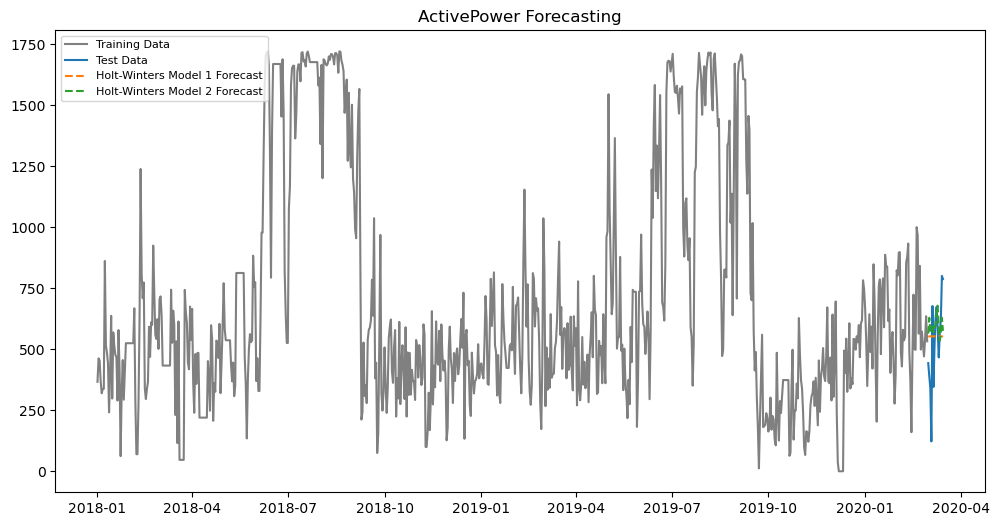

In [49]:
# Initialize list for model results
model_results = []

# Try Holt-Winters models
try:
    model_1 = ExponentialSmoothing(train['ActivePower'], trend=None, seasonal="add", seasonal_periods=2).fit()
    forecast_1 = model_1.forecast(len(test))
    model_results.append(('Holt-Winters Model 1', model_1, forecast_1))

    model_2 = ExponentialSmoothing(train['ActivePower'], seasonal="add", seasonal_periods=12, damped_trend=False).fit()
    forecast_2 = model_2.forecast(len(test))
    model_results.append(('Holt-Winters Model 2', model_2, forecast_2))
except:
    print("Holt-Winters model failed. Fallback to simpler model.")
    simple_model = SimpleExpSmoothing(train['ActivePower']).fit()
    simple_forecast = simple_model.forecast(len(test))
    model_results.append(('Simple Exponential Smoothing', simple_model, simple_forecast))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train['ActivePower'], label='Training Data', color='grey')
plt.plot(test['ActivePower'], label='Test Data')

for model_name, fitted_model, forecast in model_results:
    plt.plot(forecast, label=f'{model_name} Forecast', linestyle='--')

plt.legend(loc='upper left', fontsize=8)
plt.title('ActivePower Forecasting')
plt.show()

In [50]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

rmse_results = {}

# Calculate RMSE for each model
for model_name, fitted_model, forecast in model_results:
    # In-sample predictions for the training set
    train_predictions = fitted_model.fittedvalues

    # Calculate RMSE for training and test sets
    train_rmse = calculate_rmse(train['ActivePower'], train_predictions)
    test_rmse = calculate_rmse(test['ActivePower'], forecast)
    rmse_results[model_name] = {'Train RMSE': train_rmse, 'Test RMSE': test_rmse}

# Output the RMSE results
for model_name, rmse in rmse_results.items():
    print(f'{model_name}: Train RMSE = {rmse["Train RMSE"]}, Test RMSE = {rmse["Test RMSE"]}')

Holt-Winters Model 1: Train RMSE = 210.1646540667945, Test RMSE = 178.35310728168915
Holt-Winters Model 2: Train RMSE = 212.00534386004603, Test RMSE = 182.7009380716648


In [51]:
# Forecast the next 15 days
nobs = 15
forecast = model_1.forecast(nobs)

# Generate the date range for the forecast, ensuring the same timezone as the data
last_date = test.index[-1]
future_dates = pd.date_range(start=last_date, periods=nobs + 1, freq='D', tz='UTC')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['ActivePowerForecast'])

In [37]:
forecast_df

,ActivePowerForecast
2020-03-16 00:00:00+00:00,563.888130
2020-03-17 00:00:00+00:00,628.530999
2020-03-18 00:00:00+00:00,575.244262
2020-03-19 00:00:00+00:00,581.196538
2020-03-20 00:00:00+00:00,593.371301
2020-03-21 00:00:00+00:00,568.799070
2020-03-22 00:00:00+00:00,588.624340
2020-03-23 00:00:00+00:00,596.972579
2020-03-24 00:00:00+00:00,667.649100
2020-03-25 00:00:00+00:00,678.412089


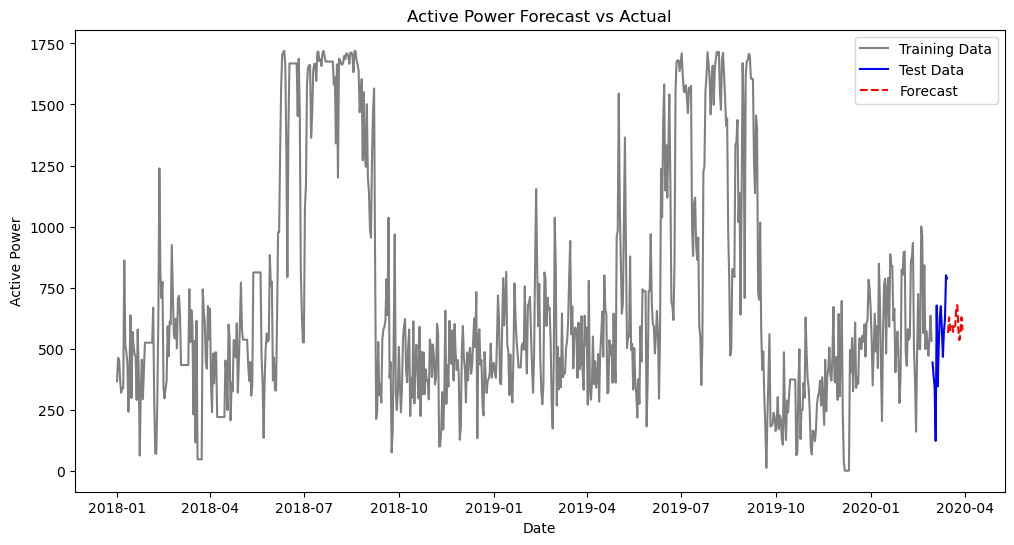

In [38]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train['ActivePower'], label='Training Data', color='grey')
plt.plot(test.index, test['ActivePower'], label='Test Data', color='blue')
plt.plot(forecast_df.index, forecast_df['ActivePowerForecast'], label='Forecast', color='red', linestyle='--')

# Adding title and labels
plt.title('Active Power Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Active Power')

# Showing legend
plt.legend()

# Display the plot
plt.show()

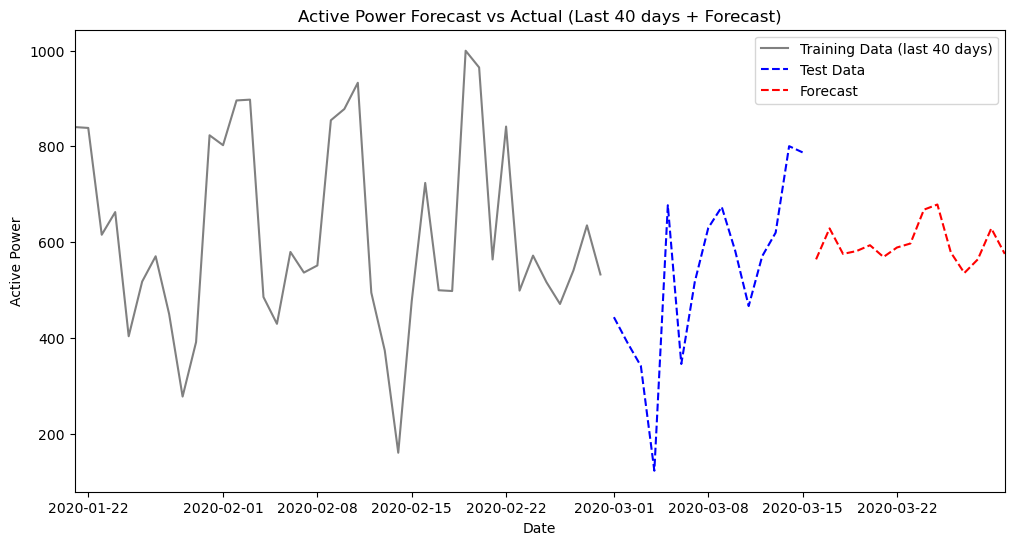

In [39]:
# Calculate the start date for the last 40 days
start_date = train.index.max() - pd.Timedelta(days=39)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.loc[start_date:]['ActivePower'], label='Training Data (last 40 days)', color='grey')
plt.plot(test['ActivePower'], label='Test Data', color='blue', linestyle='--')
plt.plot(forecast_df['ActivePowerForecast'], label='Forecast', color='red', linestyle='--')

# Adding title and labels
plt.title('Active Power Forecast vs Actual (Last 40 days + Forecast)')
plt.xlabel('Date')
plt.ylabel('Active Power')

# Setting the x-axis limits to the last 40 days of training and the forecast period
plt.xlim([start_date, forecast_df.index.max()])

# Showing legend
plt.legend()

# Display the plot
plt.show()

In [40]:
# Forecast the next 15 days
nobs = 15
forecast = model_2.forecast(nobs)

# Generate the date range for the forecast, ensuring the same timezone as the data
last_date = test.index[-1]
future_dates = pd.date_range(start=last_date, periods=nobs + 1, freq='D', tz='UTC')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['ActivePowerForecast'])

In [41]:
forecast_df

,ActivePowerForecast
2020-03-16 00:00:00+00:00,563.888130
2020-03-17 00:00:00+00:00,628.530999
2020-03-18 00:00:00+00:00,575.244262
2020-03-19 00:00:00+00:00,581.196538
2020-03-20 00:00:00+00:00,593.371301
2020-03-21 00:00:00+00:00,568.799070
2020-03-22 00:00:00+00:00,588.624340
2020-03-23 00:00:00+00:00,596.972579
2020-03-24 00:00:00+00:00,667.649100
2020-03-25 00:00:00+00:00,678.412089


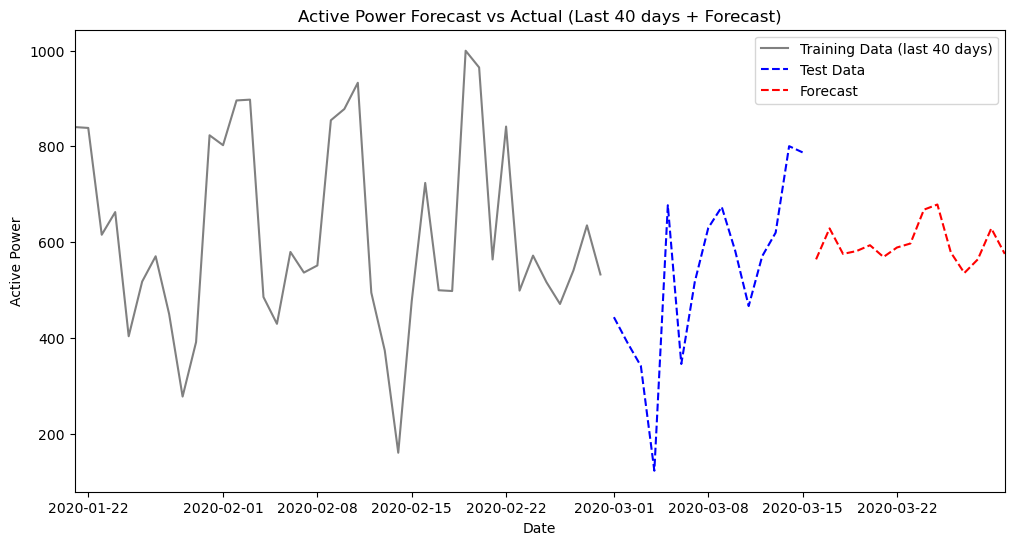

In [42]:
# Calculate the start date for the last 40 days
start_date = train.index.max() - pd.Timedelta(days=39)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.loc[start_date:]['ActivePower'], label='Training Data (last 40 days)', color='grey')
plt.plot(test['ActivePower'], label='Test Data', color='blue', linestyle='--')
plt.plot(forecast_df['ActivePowerForecast'], label='Forecast', color='red', linestyle='--')

# Adding title and labels
plt.title('Active Power Forecast vs Actual (Last 40 days + Forecast)')
plt.xlabel('Date')
plt.ylabel('Active Power')

# Setting the x-axis limits to the last 40 days of training and the forecast period
plt.xlim([start_date, forecast_df.index.max()])

# Showing legend
plt.legend()

# Display the plot
plt.show()